# Out Of Lab Week 2
## January 18th
### Songgun Lee

**Goal** : 

I will follow the out-of-lab guidelines provided to find the charge to mass ratio of the electron.

Starting Time: 13:00

Equation 1: $$\frac{1}{2}mv^2=eV$$

On the left side is the kinetic energy of the particle and on the righ side is the electric potential energy gained or lost by the particle when it moves through a potential difference (V). $m$ is the mass of the electron, $v$ is the velocity of the electron, $e$ is the charge of the electron, and $V$ is the electric potential difference.

This equation seems valid to me, although I would have to make the assumption that no energy is lost during the process of all the energy from the potential difference being converted into the kinetic energy of the particle. I believe that I can use this equation to calculate the velocity of electrons after being accelerated through a known voltage, since the mass of the electron is known and the voltage would also be known.

Now I will modify this equation to determine the charge-to-mass ratio of the electron.

$$\frac{e}{m}=\frac{v^2}{2V}$$

I measured the potential difference $V$ directly, but I did not directly measure $m$,$v$, and $e$. I believe that $m$ and $e$ are a fixed value, but I would have to find the velocity of the electron after being accelerated, $v$.

Equation 2: $$B = \frac{8}{\sqrt{125}}\frac{\mu_{0}N}{a}I$$

$B$ - magnetic field by Helmholtz coils

$N = 72\pm0.1$ - number of turns in coils

$a=33\pm1$cm - radius of coils

$I$ - current flowing in coils

$\mu_{0} = 4\pi*10^{-7}T*m/A$ - permeability of free space


Equation 3: $$F = evB$$

$F$ - magnetic force on the charged particle

$e$ - charge of electron

$v$ - velocity of electron

$B$ - magnetic field by Helmholtz coils

This is the Lorenz force equation, which describes the force experienced by a charged particle moving through a magnetic field. The force is constant in magnitude and is always perpendicular to the motion of electrons, making the electrons move in a circular path.

Equation 4: $$F = \frac{mv^2}{R}$$

$F$ - centripetal force on the electron undergoing circular motion

$m$ - mass of electron

$v$ - velocity of electron

$R$ - radius of the circular path

When Equation 3 = Equation 4,

$$evB=\frac{mv^2}{R}$$
$$v=\frac{ReB}{m}$$

Substitute this value I gained and plug in to the charge-to-mass ratio equation.

$$\frac{e}{m}=\frac{e^2B^2R^2}{2m^2V}$$
$$\frac{e}{m}=\frac{2V}{B^2R^2}=\frac{125a^2V}{32R^2\mu_{0}^2N^2I^2}$$
$$\sigma_{\frac{e}{m}} = \sqrt{\frac{4 \sigma_V^2}{B^4 R^4} + \frac{16 V^2 \sigma_B^2}{B^6 R^4} + \frac{16 V^2 \sigma_R^2}{B^4 R^6}}$$
$$\sigma_B = \sqrt{\left( \frac{8}{\sqrt{125}} \frac{\mu_0}{a} I \cdot \sigma_N \right)^2 + \left( -\frac{8}{\sqrt{125}} \frac{\mu_0 N}{a^2} I \cdot \sigma_a \right)^2 + \left( \frac{8}{\sqrt{125}} \frac{\mu_0 N}{a} \cdot \sigma_I \right)^2}$$
$$\sigma_B = (2.26 \times 10^{-6}) \sqrt{\left( \frac{I_\text{observed} \cdot 0.1}{0.33} \right)^2 + \left( \frac{72 \cdot I_\text{observed} \cdot 0.01}{0.33^2} \right)^2 + \left( \frac{72 \cdot \sigma_I}{0.33} \right)^2}$$

The uncertainty of $R$ and $V$ need to be calculated using the RMSD(root mean standard deviation) method.
$$\text{RMSD} = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x} )^2}$$

I will also use the RMSD to find the Helmholtz coil current, 

In [194]:
import pandas as pd
import numpy as np

#Calculating e/m
mu_0 = 4 * np.pi * 10**-7  # Permeability of free space (T*m/A)
N = 72  # Number of turns in the Helmholtz coil
a = 0.33  # Radius of the coils in meters
V = 23.82  # Mean accelerating voltage

R = 32 / 1000  # Radius in meters
I = 2.706  # Mean coil current
sigma_V = 0.040  # RMSD for voltage
sigma_I = 0.015  # RMSD for current
sigma_R = 1 / np.sqrt(12) / 1000  # RMSD for radius

# Compute B and sigma_B
B = (8 / np.sqrt(125)) * (mu_0 * N / a) * I
sigma_B = (2.26 * 10**-6) * np.sqrt((I * 0.1 / 0.33)**2 + ((72 * I * 0.01 / 0.33**2)**2) + (72 * sigma_I / 0.33)**2)

# Compute e/m and its uncertainty
e_m = 2 * V / (B**2 * R**2)
sigma_e_m = np.sqrt((4 * sigma_V**2 / (B**4 * R**4)) + (16 * V**2 * sigma_B**2 / (B**6 * R**4)) + (16 * V**2 * sigma_R**2 / (B**4 * R**6)))

# Data setup
measurements = [
    "Cross bar position", 
    "Helmholtz coil current", 
    "Helmholtz coil voltage", 
    "Accelerating voltage", 
    "Accelerating current", 
    "Radius of beam path"
    "Calculated e/m"
]

values = [
    64,  # Cross bar position in mm
    np.mean([2.70, 2.68, 2.72, 2.71, 2.72]),  # Mean Helmholtz coil current
    np.mean([7.4, 7.4, 7.5, 7.5, 7.5]),  # Mean Helmholtz coil voltage
    np.mean([23.9, 23.8, 23.8, 23.8, 23.8]),  # Mean accelerating voltage
    np.mean([4.4, 4.4, 4.4, 4.4, 4.4]),  # Mean accelerating current
    32,  # Radius of beam path (half the cross bar position)
    f"(C/kg): {e_m:.2e}"
]

uncertainties = [
    1 / np.sqrt(12),  # Uncertainty for cross bar position
    np.sqrt(np.mean((np.array([2.70, 2.68, 2.72, 2.71, 2.72]) - np.mean([2.70, 2.68, 2.72, 2.71, 2.72]))**2)),  # RMSD for current
    np.sqrt(np.mean((np.array([7.4, 7.4, 7.5, 7.5, 7.5]) - np.mean([7.4, 7.4, 7.5, 7.5, 7.5]))**2)),  # RMSD for voltage
    np.sqrt(np.mean((np.array([23.9, 23.8, 23.8, 23.8, 23.8]) - np.mean([23.9, 23.8, 23.8, 23.8, 23.8]))**2)),  # RMSD for accelerating voltage
    0.1 / np.sqrt(12),  # Uncertainty for accelerating current
    1 / np.sqrt(12),  # Uncertainty for radius
    f"(C/kg): {sigma_e_m:.2e}"
]

# Create a DataFrame with individual columns for each measurement
df1 = pd.DataFrame({
    "Cross bar position (mm)": [values[0], uncertainties[0]],
    "Helmholtz coil current (A)": [values[1], uncertainties[1]],
    "Helmholtz coil voltage (V)": [values[2], uncertainties[2]],
    "Accelerating voltage (V)": [values[3], uncertainties[3]],
    "Accelerating current (A)": [values[4], uncertainties[4]],
    "Radius of beam path (mm)": [values[5], uncertainties[5]],
    "Calculated e/m": [values[6], uncertainties[6]]
}, index=["Value", "Uncertainty"])

# Set more precise display for floating numbers
pd.options.display.float_format = '{:,.3f}'.format

# Print the DataFrame
print(df1)

             Cross bar position (mm)  Helmholtz coil current (A)  \
Value                         64.000                       2.706   
Uncertainty                    0.289                       0.015   

             Helmholtz coil voltage (V)  Accelerating voltage (V)  \
Value                             7.460                    23.820   
Uncertainty                       0.049                     0.040   

             Accelerating current (A)  Radius of beam path (mm)  \
Value                           4.400                    32.000   
Uncertainty                     0.029                     0.289   

               Calculated e/m  
Value        (C/kg): 1.65e+11  
Uncertainty  (C/kg): 2.58e+10  


In [196]:
R = 39 / 1000  # Radius in meters
I = 2.280  # Mean coil current
sigma_V = 0.040  # RMSD for voltage
sigma_I = 0.023  # RMSD for current
sigma_R = 1 / np.sqrt(12) / 1000  # RMSD for radius

# Compute B and sigma_B
B = (8 / np.sqrt(125)) * (mu_0 * N / a) * I
sigma_B = (2.26 * 10**-6) * np.sqrt((I * 0.1 / 0.33)**2 + ((72 * I * 0.01 / 0.33**2)**2) + (72 * sigma_I / 0.33)**2)

# Compute e/m and its uncertainty
e_m = 2 * V / (B**2 * R**2)
sigma_e_m = np.sqrt((4 * sigma_V**2 / (B**4 * R**4)) + (16 * V**2 * sigma_B**2 / (B**6 * R**4)) + (16 * V**2 * sigma_R**2 / (B**4 * R**6)))

# Data setup
measurements = [
    "Cross bar position", 
    "Helmholtz coil current", 
    "Helmholtz coil voltage", 
    "Accelerating voltage", 
    "Accelerating current", 
    "Radius of beam path"
    "Calculated e/m"
]

values = [
    78,  # Cross bar position in mm
    np.mean([2.25,2.28,2.27,2.28,2.32]),  # Mean Helmholtz coil current
    np.mean([6.1,6.3,6.3,6.3,6.4]),  # Mean Helmholtz coil voltage
    np.mean([23.9, 23.8, 23.8, 23.8, 23.8]),  # Mean accelerating voltage
    np.mean([4.4, 4.4, 4.4, 4.4, 4.4]),  # Mean accelerating current
    39,  # Radius of beam path (half the cross bar position)
    f"(C/kg): {e_m:.2e}"
]

uncertainties = [
    1 / np.sqrt(12),  # Uncertainty for cross bar position
    np.sqrt(np.mean((np.array([2.25,2.28,2.27,2.28,2.32]) - np.mean([2.25,2.28,2.27,2.28,2.32]))**2)),  # RMSD for current
    np.sqrt(np.mean((np.array([6.1,6.3,6.3,6.3,6.4]) - np.mean([6.1,6.3,6.3,6.3,6.4]))**2)),  # RMSD for voltage
    np.sqrt(np.mean((np.array([23.9, 23.8, 23.8, 23.8, 23.8]) - np.mean([23.9, 23.8, 23.8, 23.8, 23.8]))**2)),  # RMSD for accelerating voltage
    0.1 / np.sqrt(12),  # Uncertainty for accelerating current
    1 / np.sqrt(12),  # Uncertainty for radius
    f"(C/kg): {sigma_e_m:.2e}"
]

# Create a DataFrame with individual columns for each measurement
df2 = pd.DataFrame({
    "Cross bar position (mm)": [values[0], uncertainties[0]],
    "Helmholtz coil current (A)": [values[1], uncertainties[1]],
    "Helmholtz coil voltage (V)": [values[2], uncertainties[2]],
    "Accelerating voltage (V)": [values[3], uncertainties[3]],
    "Accelerating current (A)": [values[4], uncertainties[4]],
    "Radius of beam path (mm)": [values[5], uncertainties[5]],
    "Calculated e/m": [values[6], uncertainties[6]]
}, index=["Value", "Uncertainty"])

# Set more precise display for floating numbers
pd.options.display.float_format = '{:,.3f}'.format

# Print the DataFrame
print(df2)

             Cross bar position (mm)  Helmholtz coil current (A)  \
Value                         78.000                       2.280   
Uncertainty                    0.289                       0.023   

             Helmholtz coil voltage (V)  Accelerating voltage (V)  \
Value                             6.280                    23.820   
Uncertainty                       0.098                     0.040   

             Accelerating current (A)  Radius of beam path (mm)  \
Value                           4.400                    39.000   
Uncertainty                     0.029                     0.289   

               Calculated e/m  
Value        (C/kg): 1.57e+11  
Uncertainty  (C/kg): 2.53e+10  


In [198]:
R = 45 / 1000  # Radius in meters
I = 1.936  # Mean coil current
sigma_V = 0.040  # RMSD for voltage
sigma_I = 0.010  # RMSD for current
sigma_R = 1 / np.sqrt(12) / 1000  # RMSD for radius

# Compute B and sigma_B
B = (8 / np.sqrt(125)) * (mu_0 * N / a) * I
sigma_B = (2.26 * 10**-6) * np.sqrt((I * 0.1 / 0.33)**2 + ((72 * I * 0.01 / 0.33**2)**2) + (72 * sigma_I / 0.33)**2)

# Compute e/m and its uncertainty
e_m = 2 * V / (B**2 * R**2)
sigma_e_m = np.sqrt((4 * sigma_V**2 / (B**4 * R**4)) + (16 * V**2 * sigma_B**2 / (B**6 * R**4)) + (16 * V**2 * sigma_R**2 / (B**4 * R**6)))

# Data setup
measurements = [
    "Cross bar position", 
    "Helmholtz coil current", 
    "Helmholtz coil voltage", 
    "Accelerating voltage", 
    "Accelerating current", 
    "Radius of beam path"
    "Calculated e/m"
]

values = [
    90,  # Cross bar position in mm
    np.mean([1.94,1.92,1.95,1.94,1.93]),  # Mean Helmholtz coil current
    np.mean([5.3,5.3,5.4,5.3,5.4]),  # Mean Helmholtz coil voltage
    np.mean([23.9, 23.8, 23.8, 23.8, 23.8]),  # Mean accelerating voltage
    np.mean([4.4, 4.4, 4.4, 4.4, 4.4]),  # Mean accelerating current
    45,  # Radius of beam path (half the cross bar position)
    f"(C/kg): {e_m:.2e}"
]

uncertainties = [
    1 / np.sqrt(12),  # Uncertainty for cross bar position
    np.sqrt(np.mean((np.array([1.94,1.92,1.95,1.94,1.93]) - np.mean([1.94,1.92,1.95,1.94,1.93]))**2)),  # RMSD for current
    np.sqrt(np.mean((np.array([5.3,5.3,5.4,5.3,5.4]) - np.mean([5.3,5.3,5.4,5.3,5.4]))**2)),  # RMSD for voltage
    np.sqrt(np.mean((np.array([23.9, 23.8, 23.8, 23.8, 23.8]) - np.mean([23.9, 23.8, 23.8, 23.8, 23.8]))**2)),  # RMSD for accelerating voltage
    0.1 / np.sqrt(12),  # Uncertainty for accelerating current
    1 / np.sqrt(12),  # Uncertainty for radius
    f"(C/kg): {sigma_e_m:.2e}"
]

# Create a DataFrame with individual columns for each measurement
df3 = pd.DataFrame({
    "Cross bar position (mm)": [values[0], uncertainties[0]],
    "Helmholtz coil current (A)": [values[1], uncertainties[1]],
    "Helmholtz coil voltage (V)": [values[2], uncertainties[2]],
    "Accelerating voltage (V)": [values[3], uncertainties[3]],
    "Accelerating current (A)": [values[4], uncertainties[4]],
    "Radius of beam path (mm)": [values[5], uncertainties[5]],
    "Calculated e/m": [values[6], uncertainties[6]]
}, index=["Value", "Uncertainty"])

# Set more precise display for floating numbers
pd.options.display.float_format = '{:,.3f}'.format

# Print the DataFrame
print(df3)

             Cross bar position (mm)  Helmholtz coil current (A)  \
Value                         90.000                       1.936   
Uncertainty                    0.289                       0.010   

             Helmholtz coil voltage (V)  Accelerating voltage (V)  \
Value                             5.340                    23.820   
Uncertainty                       0.049                     0.040   

             Accelerating current (A)  Radius of beam path (mm)  \
Value                           4.400                    45.000   
Uncertainty                     0.029                     0.289   

               Calculated e/m  
Value        (C/kg): 1.63e+11  
Uncertainty  (C/kg): 2.53e+10  


In [200]:
R = 52 / 1000  # Radius in meters
I = 1.704  # Mean coil current
sigma_V = 0.040  # RMSD for voltage
sigma_I = 0.015  # RMSD for current
sigma_R = 1 / np.sqrt(12) / 1000  # RMSD for radius

# Compute B and sigma_B
B = (8 / np.sqrt(125)) * (mu_0 * N / a) * I
sigma_B = (2.26 * 10**-6) * np.sqrt((I * 0.1 / 0.33)**2 + ((72 * I * 0.01 / 0.33**2)**2) + (72 * sigma_I / 0.33)**2)

# Compute e/m and its uncertainty
e_m = 2 * V / (B**2 * R**2)
sigma_e_m = np.sqrt((4 * sigma_V**2 / (B**4 * R**4)) + (16 * V**2 * sigma_B**2 / (B**6 * R**4)) + (16 * V**2 * sigma_R**2 / (B**4 * R**6)))

# Data setup
measurements = [
    "Cross bar position", 
    "Helmholtz coil current", 
    "Helmholtz coil voltage", 
    "Accelerating voltage", 
    "Accelerating current", 
    "Radius of beam path"
    "Calculated e/m"
]

values = [
    104,  # Cross bar position in mm
    np.mean([1.70,1.72,1.68,1.70]),  # Mean Helmholtz coil current
    np.mean([4.6,4.8,4.7,4.7,4.8]),  # Mean Helmholtz coil voltage
    np.mean([23.9, 23.8, 23.8, 23.8, 23.8]),  # Mean accelerating voltage
    np.mean([4.4, 4.4, 4.4, 4.4, 4.4]),  # Mean accelerating current
    52,  # Radius of beam path (half the cross bar position)
    f"(C/kg): {e_m:.2e}"
]

uncertainties = [
    1 / np.sqrt(12),  # Uncertainty for cross bar position
    np.sqrt(np.mean((np.array([1.70,1.72,1.68,1.70]) - np.mean([1.70,1.72,1.68,1.70]))**2)),  # RMSD for current
    np.sqrt(np.mean((np.array([4.6,4.8,4.7,4.7,4.8]) - np.mean([4.6,4.8,4.7,4.7,4.8]))**2)),  # RMSD for voltage
    np.sqrt(np.mean((np.array([23.9, 23.8, 23.8, 23.8, 23.8]) - np.mean([23.9, 23.8, 23.8, 23.8, 23.8]))**2)),  # RMSD for accelerating voltage
    0.1 / np.sqrt(12),  # Uncertainty for accelerating current
    1 / np.sqrt(12),  # Uncertainty for radius
    f"(C/kg): {sigma_e_m:.2e}"
]

# Create a DataFrame with individual columns for each measurement
df4 = pd.DataFrame({
    "Cross bar position (mm)": [values[0], uncertainties[0]],
    "Helmholtz coil current (A)": [values[1], uncertainties[1]],
    "Helmholtz coil voltage (V)": [values[2], uncertainties[2]],
    "Accelerating voltage (V)": [values[3], uncertainties[3]],
    "Accelerating current (A)": [values[4], uncertainties[4]],
    "Radius of beam path (mm)": [values[5], uncertainties[5]],
    "Calculated e/m": [values[6], uncertainties[6]]
}, index=["Value", "Uncertainty"])

# Set more precise display for floating numbers
pd.options.display.float_format = '{:,.3f}'.format

# Print the DataFrame
print(df4)

             Cross bar position (mm)  Helmholtz coil current (A)  \
Value                        104.000                       1.700   
Uncertainty                    0.289                       0.014   

             Helmholtz coil voltage (V)  Accelerating voltage (V)  \
Value                             4.720                    23.820   
Uncertainty                       0.075                     0.040   

             Accelerating current (A)  Radius of beam path (mm)  \
Value                           4.400                    52.000   
Uncertainty                     0.029                     0.289   

               Calculated e/m  
Value        (C/kg): 1.58e+11  
Uncertainty  (C/kg): 2.51e+10  


In [202]:
R = 57 / 1000  # Radius in meters
I = 1.516  # Mean coil current
sigma_V = 0.040  # RMSD for voltage
sigma_I = 0.1 / np.sqrt(12)  # RMSD for current
sigma_R = 1 / np.sqrt(12) / 1000  # RMSD for radius

# Compute B and sigma_B
B = (8 / np.sqrt(125)) * (mu_0 * N / a) * I
sigma_B = (2.26 * 10**-6) * np.sqrt((I * 0.1 / 0.33)**2 + ((72 * I * 0.01 / 0.33**2)**2) + (72 * sigma_I / 0.33)**2)

# Compute e/m and its uncertainty
e_m = 2 * V / (B**2 * R**2)
sigma_e_m = np.sqrt((4 * sigma_V**2 / (B**4 * R**4)) + (16 * V**2 * sigma_B**2 / (B**6 * R**4)) + (16 * V**2 * sigma_R**2 / (B**4 * R**6)))

# Data setup
measurements = [
    "Cross bar position", 
    "Helmholtz coil current", 
    "Helmholtz coil voltage", 
    "Accelerating voltage", 
    "Accelerating current", 
    "Radius of beam path"
    "Calculated e/m"
]

values = [
    104,  # Cross bar position in mm
    np.mean([1.54,1.51,1.50,1.51,1.52]),  # Mean Helmholtz coil current
    np.mean([4.2,4.2,4.2,4.2,4.2]),  # Mean Helmholtz coil voltage
    np.mean([23.9, 23.8, 23.8, 23.8, 23.8]),  # Mean accelerating voltage
    np.mean([4.4, 4.4, 4.4, 4.4, 4.4]),  # Mean accelerating current
    52,  # Radius of beam path (half the cross bar position)
    f"(C/kg): {e_m:.2e}"
]

uncertainties = [
    1 / np.sqrt(12),  # Uncertainty for cross bar position
    np.sqrt(np.mean((np.array([1.54,1.51,1.50,1.51,1.52]) - np.mean([1.54,1.51,1.50,1.51,1.52]))**2)),  # RMSD for current
    np.sqrt(np.mean((np.array([4.2,4.2,4.2,4.2,4.2]) - np.mean([4.2,4.2,4.2,4.2,4.2]))**2)),  # RMSD for voltage
    np.sqrt(np.mean((np.array([23.9, 23.8, 23.8, 23.8, 23.8]) - np.mean([23.9, 23.8, 23.8, 23.8, 23.8]))**2)),  # RMSD for accelerating voltage
    0.1 / np.sqrt(12),  # Uncertainty for accelerating current
    1 / np.sqrt(12),  # Uncertainty for radius
    f"(C/kg): {sigma_e_m:.2e}"
]

# Create a DataFrame with individual columns for each measurement
df5 = pd.DataFrame({
    "Cross bar position (mm)": [values[0], uncertainties[0]],
    "Helmholtz coil current (A)": [values[1], uncertainties[1]],
    "Helmholtz coil voltage (V)": [values[2], uncertainties[2]],
    "Accelerating voltage (V)": [values[3], uncertainties[3]],
    "Accelerating current (A)": [values[4], uncertainties[4]],
    "Radius of beam path (mm)": [values[5], uncertainties[5]],
    "Calculated e/m": [values[6], uncertainties[6]]
}, index=["Value", "Uncertainty"])

# Set more precise display for floating numbers
pd.options.display.float_format = '{:,.3f}'.format

# Print the DataFrame
print(df5)

             Cross bar position (mm)  Helmholtz coil current (A)  \
Value                        104.000                       1.516   
Uncertainty                    0.289                       0.014   

             Helmholtz coil voltage (V)  Accelerating voltage (V)  \
Value                             4.200                    23.820   
Uncertainty                       0.000                     0.040   

             Accelerating current (A)  Radius of beam path (mm)  \
Value                           4.400                    52.000   
Uncertainty                     0.029                     0.289   

               Calculated e/m  
Value        (C/kg): 1.66e+11  
Uncertainty  (C/kg): 2.99e+10  


I did not match the number of significant figures in the table, but when I am actually doing the calculation I will make sure to use the appropriate significant figures.

$$\langle \frac{e}{m} \rangle = \frac{\sum_i \frac{(e/m)_i}{\sigma_i^2}}{\sum_i \frac{1}{\sigma_i^2}}$$

In [206]:
# e/m values and their corresponding uncertainties
e_m_values = np.array([1.65e11, 1.57e11, 1.63e11, 1.58e11, 1.66e11])
sigma_e_m = np.array([2.58e10, 2.53e10, 2.53e10, 2.51e10, 2.99e10])

# Calculating the weighted average of e/m
weights = 1 / sigma_e_m**2
weighted_average_e_m = np.sum(e_m_values * weights) / np.sum(weights)
print(f"Weighted average e/m: {weighted_average_e_m:.2e}")


Weighted average e/m: 1.62e+11


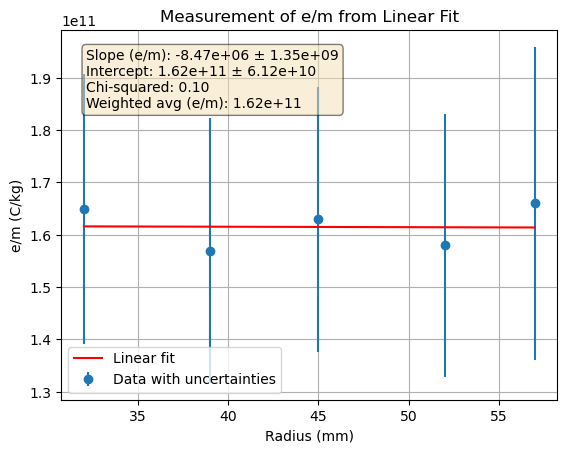

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data (Rescale for numerical stability)
x_data = np.array([32, 39, 45, 52, 57])  # Radii in mm
y_data = np.array([1.65e11, 1.57e11, 1.63e11, 1.58e11, 1.66e11])  # e/m values (C/kg)
y_uncertainty = np.array([2.58e10, 2.53e10, 2.53e10, 2.51e10, 2.99e10])  # Uncertainties

# Rescale for better numerical stability
x_rescaled = x_data / 100  # Scale radii (e.g., from mm to meters)
y_rescaled = y_data / 1e11  # Scale e/m values
y_uncertainty_rescaled = y_uncertainty / 1e11

# Define the linear function
def linear(x, m, c):
    return m * x + c

# Perform linear fit
popt, pcov = curve_fit(linear, x_rescaled, y_rescaled, sigma=y_uncertainty_rescaled, absolute_sigma=True)
slope_rescaled, intercept_rescaled = popt
slope_uncertainty_rescaled, intercept_uncertainty_rescaled = np.sqrt(np.diag(pcov))

# Scale back the slope and intercept to original units
slope = slope_rescaled * 1e11 / 100  # Undo scaling for slope
intercept = intercept_rescaled * 1e11  # Undo scaling for intercept
slope_uncertainty = slope_uncertainty_rescaled * 1e11 / 100
intercept_uncertainty = intercept_uncertainty_rescaled * 1e11

# Calculate chi-squared
residuals = y_rescaled - linear(x_rescaled, *popt)
chi_squared = np.sum((residuals / y_uncertainty_rescaled) ** 2)

# Weighted average
weights = 1 / y_uncertainty**2
weighted_average = np.sum(y_data * weights) / np.sum(weights)

# Plot the data with uncertainties and the fit
plt.errorbar(x_data, y_data, yerr=y_uncertainty, fmt='o', label='Data with uncertainties')
x_fit = np.linspace(min(x_data), max(x_data), 500)
plt.plot(x_fit, linear(x_fit / 100, *popt) * 1e11, 'r-', label='Linear fit')  # Apply scaling

# Annotations
textstr = (f"Slope (e/m): {slope:.2e} ± {slope_uncertainty:.2e}\n"
           f"Intercept: {intercept:.2e} ± {intercept_uncertainty:.2e}\n"
           f"Chi-squared: {chi_squared:.2f}\n"
           f"Weighted avg (e/m): {weighted_average:.2e}")
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

# Labels and title
plt.xlabel('Radius (mm)')
plt.ylabel('e/m (C/kg)')
plt.title('Measurement of e/m from Linear Fit')
plt.legend()
plt.grid(True)
plt.show()


#### Comments on Plot

I am unsure if this is the result I should have gotten. I tried plotting $2V$ vs $B^2R^2$ but it gave terrible results so I tried it this way to show that my results show that the intercept follow along the value of the weighted average. However, I would like to know what an ideal plot would look like in this case since my plot does not seem to be the best way to interpret it.After all, the slope seems to be 0. The chi-squared value is 0.1 suggests that this model fits the data very well. However, as we can see, the uncertainties are very big. This is due to the systematic error where there is a thickness in the beam of light. I can decrease this uncertainty by taking multiple more measurements.

The relative uncertainty is calculated by 
$$\text{Relative Uncertainty(\%))}=\frac{2.53*10^{10}}{1.62*10^{11}}*100=15.6\% $$

15.6 is greater than 1 and smaller than 20, so it is not excellent nor poor. It is "alright but could be better".

The accepted value of $\frac{e}{m} =1.758820*10^{11}\text{C/kg}$ according to the University of Virginia's laboratory manual.

$$\text{Discrepancy}=|{1.62*10^{11}-1.758820*10^{11}}|=1.39*10^{10}\text{C/kg}<\sigma_{\frac{e}{m}}=2.53*10^{10}\text{C/kg}$$

So the result is consistent with the accepted value within experimental uncertainty.

My largest source of uncertainty comes from the radius of the electron beam's circular path (R). In the future, I might use high-resolution measurement tools such as cameras to measure the radius more precisely. I may also repeat multiple measurements for a better result.

#### Conclusion

The measured charge-to-mass ratio of the electron was determined to be consistent with the accepted value within experimental uncertainty. However, I am not fully satisfied with my plotting process. Initially, I attempted to plot variables according to the theoretical model, but this yielded poor results, likely due to large uncertainties in the data. As an alternative, I used a linear plot to illustrate the relationship, but the slope appeared to be close to zero, which is not ideal and does not align with theoretical expectations. This leaves me questioning whether my choice of plotting method and analysis was appropriate.

My frustration with plotting stems from the large uncertainties in measurements, particularly the radius of the electron beam's circular path, and the difficulty in selecting a plot that effectively highlights the theoretical relationship. In hindsight, I could improve by reducing measurement uncertainties using more precise tools and taking additional measurements to improve statistical reliability. Additionally, verifying the ideal plotting method beforehand and consulting references or simulations could have helped produce a better visualization.

Despite these challenges, the experiment demonstrates the validity of the charge-to-mass ratio calculation. Improvements in measurement precision and plotting techniques in future experiments could yield more satisfactory and conclusive results.

Time Ended: 21:42